In [3]:
import os
from dotenv import load_dotenv
import openai
import csv
import pandas as pd
from openai import OpenAI

In [4]:
df = pd.read_csv("IMDB Dataset.csv")

In [5]:
load_dotenv()
openai_api_key = os.getenv("OPENAI_API_KEY")
if not openai_api_key:
    raise ValueError("No OpenAI API key found. Check your .env file.")
openai.api_key = openai_api_key

In [14]:
client = OpenAI()
def analyze_gpt35(text):
    messages = [
        {"role": "system", "content": """You are trained to analyze and detect the sentiment of given text. 
                                        If you're unsure of an answer, you can say "not sure" and recommend users to review manually."""},
        {"role": "user", "content": f"""Analyze the following product review and determine if the sentiment is: positive or negative. 
                                        Return answer in single word as either positive or negative: {text}"""}
        ]
   
    response = client.chat.completions.create(
                      model="gpt-3.5-turbo",
                      messages=messages, 
                      max_tokens=1, 
                      n=1, 
                      stop=None, 
                      temperature=0)

    response_text = response.choices[0].message.content.strip().lower()

    return response_text

In [16]:
df_test = df.head(100)

In [17]:
print(df_test)

                                               review sentiment
0   One of the other reviewers has mentioned that ...  positive
1   A wonderful little production. <br /><br />The...  positive
2   I thought this was a wonderful way to spend ti...  positive
3   Basically there's a family where a little boy ...  negative
4   Petter Mattei's "Love in the Time of Money" is...  positive
..                                                ...       ...
95  Daniel Day-Lewis is the most versatile actor a...  positive
96  My guess would be this was originally going to...  negative
97  Well, I like to watch bad horror B-Movies, cau...  negative
98  This IS the worst movie I have ever seen, as w...  negative
99  I have been a Mario fan for as long as I can r...  positive

[100 rows x 2 columns]


In [20]:
df_test['predicted_gpt35'] = df_test['review'].apply(analyze_gpt35)

/var/folders/xg/jz066c5d5jn87vqnb688_0d00000gn/T/ipykernel_37155/871603447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predicted_gpt35'] = df_test['review'].apply(analyze_gpt35)


In [21]:
print(df_test)

                                               review sentiment  \
0   One of the other reviewers has mentioned that ...  positive   
1   A wonderful little production. <br /><br />The...  positive   
2   I thought this was a wonderful way to spend ti...  positive   
3   Basically there's a family where a little boy ...  negative   
4   Petter Mattei's "Love in the Time of Money" is...  positive   
..                                                ...       ...   
95  Daniel Day-Lewis is the most versatile actor a...  positive   
96  My guess would be this was originally going to...  negative   
97  Well, I like to watch bad horror B-Movies, cau...  negative   
98  This IS the worst movie I have ever seen, as w...  negative   
99  I have been a Mario fan for as long as I can r...  positive   

   predicted_gpt35  
0         positive  
1         positive  
2         positive  
3         negative  
4         positive  
..             ...  
95        positive  
96        negative  
97    

In [23]:
print(df_test[["sentiment","predicted_gpt35"]].value_counts())

sentiment  predicted_gpt35
negative   negative           55
positive   positive           40
negative   positive            3
positive   negative            2
Name: count, dtype: int64


In [24]:
import matplotlib.pyplot as plt

In [25]:
value_counts = df_test[["sentiment", "predicted_gpt35"]].value_counts().reset_index(name="counts")

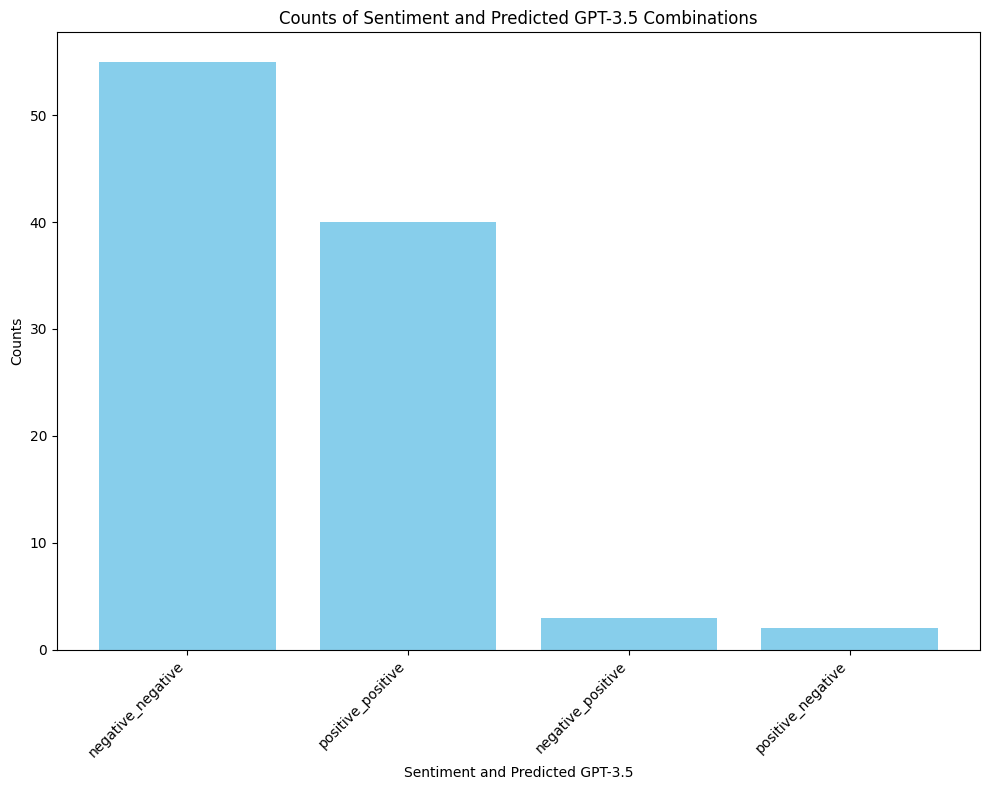

In [26]:
# Creating a figure and axis object
fig, ax = plt.subplots(figsize=(10, 8))

# Plotting bar chart
# We use `range(len(value_counts))` to generate X positions for each bar.
ax.bar(range(len(value_counts)), value_counts['counts'], color='skyblue')

# Setting the x-ticks to show our labels. Assuming the combination of sentiment and predicted_gpt35 as labels.
ax.set_xticks(range(len(value_counts)))
ax.set_xticklabels(['{}_{}'.format(sent, pred) for sent, pred in zip(value_counts['sentiment'], value_counts['predicted_gpt35'])], rotation=45, ha="right")

# Adding some labels and title for clarity
ax.set_ylabel('Counts')
ax.set_xlabel('Sentiment and Predicted GPT-3.5')
ax.set_title('Counts of Sentiment and Predicted GPT-3.5 Combinations')

# Showing the plot
plt.tight_layout()
plt.show()


In [28]:
pd.set_option('display.max_colwidth', None)
positive_negative = df_test[(df_test['sentiment'] == 'positive') & (df_test['predicted_gpt35'] == 'negative')]
negative_positive = df_test[(df_test['sentiment'] == 'negative') & (df_test['predicted_gpt35'] == 'positive')]
mismatched_reviews = pd.concat([positive_negative, negative_positive])
print(mismatched_reviews[['review', 'sentiment', 'predicted_gpt35']])


In [29]:
df_test.to_csv('sentiment_gpt3.5_test.csv', index=False)